## Подключение бибилиотек

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as ticker
import math
import random

from scipy.optimize import curve_fit

In [2]:
from os import listdir
from os.path import isfile, join
import re

## Оценка количества слов

In [5]:
folder = r'..\x64\Debug\tests'

files = listdir(folder)

words = set()

for file in files:
    with open(folder + '\\' + file, 'r') as f:
        
        fileWords = f.read()
        
        repl = "!@#$%^&*()1234567890:\';[]{}\|/?.,<>~`-=_+"
        
        for char in repl:
            fileWords = fileWords.replace(char, ' ')
            
        fileWords = fileWords.replace('"', ' ')

        fileWords = re.split(' |\t|\n', fileWords)
        
        words.update(fileWords)
        #print(len(words))
        
# Shakspear lexicon words - 24489
# Formal words - 68865

print(len(words))
count = 0

for word in words:
    if (len(word) > 16):
        print(word)
        count += 1
        
print(count)

30529
indistinguishable
honorificabilitudinitatibus
Anthropophaginian
undistinguishable
4


In [17]:
times = [


43781,
43878,
43446
    
]

average = sum(times) / 3

sigma = 0

for i in times:
    sigma += (i - average)**2

sigma = ((sigma)/(2))**0.5

print('t_average = ', average, ' +- ', sigma)

t_average =  43701.666666666664  +-  226.66348036976166


## Загрузка данных

In [3]:
files = [#'hash_statistic_list_10.csv',
         'hash_statistic_list_23.csv',
         'hash_statistic_list_101.csv',
         'hash_statistic_list_1511.csv',
         'hash_statistic_list_15013.csv',]

data = []

for file in files:
    _data = pd.read_csv(file, 
                     header = None,
                     usecols = [0,1,2,3,4,5])
        
    data.append(_data)

print(data[0])

        0       1       2       3       4       5
0   hash1   hash2   hash3   hash4   hash5   hash6
1       0    2815       0    1356    1363    1303
2   30538    1479      39    1326    1341    1290
3       0    1132     169    1293    1305    1394
4       0     756     860    1380    1359    1316
5       0    1016    2590    1315    1284    1300
6       0    1251    3912    1344    1282    1347
7       0    1552    5234    1344    1342    1364
8       0    2428    5557    1326    1239    1306
9       0    1864    4707    1278    1368    1369
10      0    1146    3363    1279    1223    1411
11      0    1283    2100    1305    1238    1318
12      0    1373    1179    1312    1320    1305
13      0     845     521    1296    1323    1278
14      0    1094     219    1341    1388    1370
15      0    1124      52    1342    1311    1322
16      0     607      33    1318    1364    1309
17      0     902       3    1340    1367    1312
18      0    1210       0    1332    1356    1354


In [4]:
hashFuncCount     = 6
hashFunctionsName = ["Всегда 1", "ASCII-код первого символа", "Длина слова", "Сумма ASCII-кодов букв", "Ror", "CRC-32"]
hashFunctionsNameEn = ["const", "letter", "length", "char_sum", "ror", "crc32"]

rowsCount     = [23, 101, 1511, 15013]
x_major_step  = [ 2,  10,  100,  1000]

In [48]:
# Подсчет пустых списков в таблице
# 0 - 23
# 1 - 101
# 2 - 1511
# 3 - 15013
testNumber = 3

# 0 - всегда 1 
# 1 - ASCII-код первого символа
# 2 - Длина слова
# 3 - Сумма ASCII-кодов букв
# 4 - ror
# 5 - crc32
hashFunction = 5

d =  data[testNumber][hashFunction][1 : rowsCount[testNumber] + 1].astype(int)

average = sum(d) / len(d)

values = [0] * (max(d) + 1)
more_avr = 0
is_null  = 0
less     = 0
sigma    = 0

for st in range(1, rowsCount[testNumber] + 1):
    values[d[st]] += 1
    if (d[st] > average):
        more_avr += 1
    if (d[st] == 0):
        is_null += 1
    if (0 < d[st] <= average):
        less += 1
    sigma += (d[st] - average)**2
    
sigma = (sigma / len(d))**0.5

print('is_null = ', is_null)
print('more_avr = ', more_avr)
print('less = ', less)
print('sigma = ', sigma, 'eps = ', sigma / average * 100)
print(values)

is_null =  1986
more_avr =  5008
less =  8019
sigma =  1.425064638216245 eps =  70.05860047658815
[1986, 3957, 4062, 2750, 1431, 575, 182, 48, 18, 4]


In [ ]:
for testNumber in range(0, 4):

    print(rowsCount[testNumber])
    for hashFunction in range(0, 6):
        d =  data[testNumber][hashFunction][1 : rowsCount[testNumber] + 1].astype(int)

        average = sum(d) / len(d)
        sigma    = 0

        for st in range(1, rowsCount[testNumber] + 1):
            sigma += (d[st] - average)**2

        sigma = (sigma)**0.5

        print(hashFunctionsNameEn[hashFunction], 'sigma = ', sigma, 'eps = ', sigma / average * 100)
    print('\n\n')

In [134]:
print(19 / 20 * 100)

6.333333333333334


## Построение графиков

### Группировка по количеству списков в хеш-таблице

In [ ]:
mpl.rcParams['font.size'] = 16

for testNumber in range(0, 4):
    fig = plt.figure(figsize = (16, 30), dpi = 200)

    fig.set_facecolor('white')

    for hashFunc in range(0, hashFuncCount):

        axes = fig.add_subplot(6, 1, hashFunc + 1)

        y = list(data[testNumber][hashFunc][1 : rowsCount[testNumber] + 1].astype(int))

        x = list(range(0, rowsCount[testNumber]))

        axes.set_title(hashFunctionsName[hashFunc])
        axes.set_xlabel("Номер списка")
        axes.set_ylabel("Количество коллизий")

        if (rowsCount[testNumber] > 750):
            axes.plot(x, y)
            axes.fill_between(x, y, [0] * rowsCount[testNumber])
        else:
            axes.bar(x, y)

        x0 = [0,  rowsCount[testNumber]]
        y0 = [30542.0 / rowsCount[testNumber]] * 2

        x_major_ticks = np.arange(0, rowsCount[testNumber]+ 1, x_major_step[testNumber])
        axes.set_xticks(x_major_ticks)

        axes.plot(x0, y0, c = 'red', label ='Среднее')
        axes.legend(loc="upper left")

    fig.suptitle("Количество списков " + str( rowsCount[testNumber]))

    plt.subplots_adjust(left=0.08, bottom=0.05, right=0.95, top=0.95, wspace=0, hspace=0.3)

    plt.show()

    fig.savefig("..\\images\\hash_list_" + str(rowsCount[testNumber]) + ".png")

### Группировка по типу функции

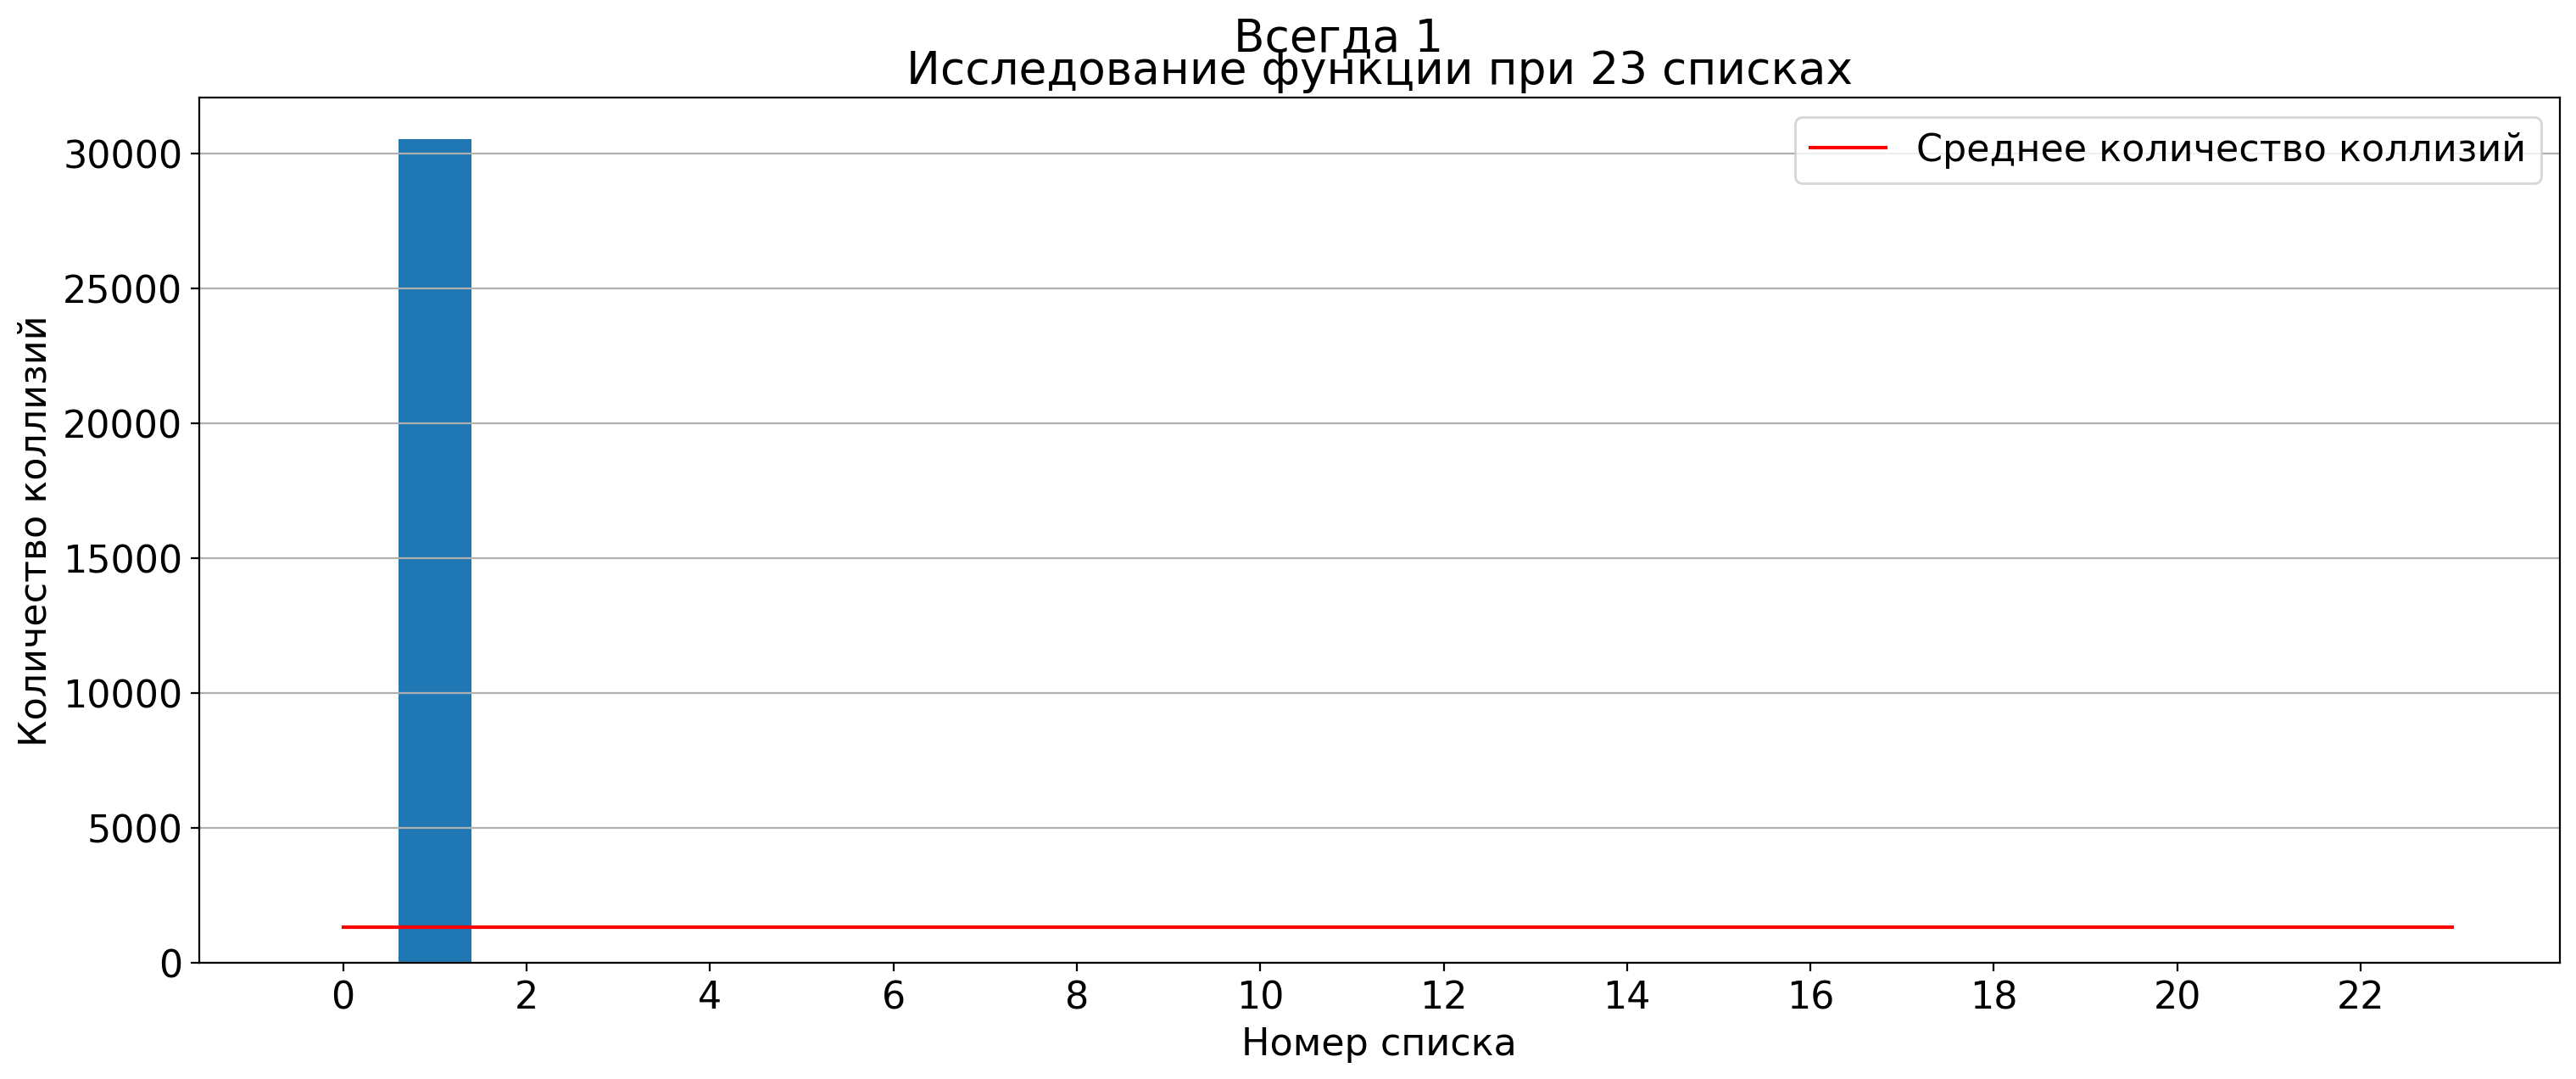

In [39]:
mpl.rcParams['font.size'] = 16

#for hashFuncIndex in range(0, 6):
if (True):
    hashFuncIndex = 0
    
    testMaxIndex = 1
    
    fig = plt.figure(figsize = (16, 2 + 4 * testMaxIndex), dpi = 200)
    
    fig.set_facecolor('white')
    
    for testIndex in range(0, testMaxIndex):

        axes = fig.add_subplot(testMaxIndex, 1, testIndex + 1)

        y = list(data[testIndex][hashFuncIndex][1 : rowsCount[testIndex] + 1].astype(int))

        x = list(range(0, rowsCount[testIndex]))
        
        x_smart = []
        y_smart = []
        
        for i in range(0, len(y)):
            y_smart.append(0)
            x_smart.append(x[i] - 0.01)
            
            y_smart.append(y[i])
            x_smart.append(x[i])            
            
            y_smart.append(0)
            x_smart.append(x[i] + 0.01)

        axes.set_title("Исследование функции при {:d} списках".format(rowsCount[testIndex]))
        axes.set_xlabel("Номер списка")
        axes.set_ylabel("Количество коллизий")

        if (rowsCount[testIndex] > 150000):
            axes.plot(x, y)
            axes.fill_between(x, y, [0] * rowsCount[testIndex])
        else:
            axes.bar(x, y)

        x0 = [0,  rowsCount[testIndex]]
        y0 = [30542.0 / rowsCount[testIndex]] * 2

        x_major_ticks = np.arange(0, rowsCount[testIndex]+ 1, x_major_step[testIndex])
        axes.set_xticks(x_major_ticks)

        axes.plot(x0, y0, c = 'red', label ='Среднее количество коллизий')
        axes.legend(loc="upper right")
        
        axes.grid(axis='y')

    fig.suptitle(hashFunctionsName[hashFuncIndex])

    plt.subplots_adjust(left=0.08, bottom=0.05, right=0.95, top=0.9, wspace=0, hspace=0.3)

    plt.show()

    fig.savefig("..\\images\\hash_" + hashFunctionsNameEn[hashFuncIndex] + ".png")